Nama : Vika Fatnawati<br>
NIM : 211351148<br>
Kelas : Malam B

# IMPORT DATASET

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikafatnawati","key":"a1374811745254bc7d07be0fdb64f28b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d ermila/klasifikasi-tingkat-kemiskinan-di-indonesia

  0% 0.00/19.3k [00:00<?, ?B/s]
100% 19.3k/19.3k [00:00<00:00, 26.5MB/s]


In [4]:
!mkdir klasifikasi-tingkat-kemiskinan-di-indonesia
!unzip klasifikasi-tingkat-kemiskinan-di-indonesia.zip -d klasifikasi-tingkat-kemiskinan-di-indonesia
!ls klasifikasi-tingkat-kemiskinan-di-indonesia

Archive:  klasifikasi-tingkat-kemiskinan-di-indonesia.zip
  inflating: klasifikasi-tingkat-kemiskinan-di-indonesia/Klasifikasi Tingkat Kemiskinan di Indonesia.csv  
'Klasifikasi Tingkat Kemiskinan di Indonesia.csv'


# IMPORT LIBRARY YANG DIGUNAKAN

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

import pickle

# DATA DISCOVERY

In [6]:
df1 = pd.read_csv('/content/klasifikasi-tingkat-kemiskinan-di-indonesia/Klasifikasi Tingkat Kemiskinan di Indonesia.csv',delimiter=';')

In [7]:
df1.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0


In [8]:
df1.shape

(999, 13)

In [9]:
df1.columns

Index(['Provinsi', 'Kab/Kota',
       'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
       'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
       'Indeks Pembangunan Manusia', 'Umur Harapan Hidup (Tahun)',
       'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
       'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
       'Tingkat Pengangguran Terbuka', 'Tingkat Partisipasi Angkatan Kerja',
       'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)',
       'Klasifikasi Kemiskinan'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object 
 7  

In [11]:
df1.isnull().sum()

Provinsi                                                                485
Kab/Kota                                                                485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            485
Indeks Pembangunan Manusia                                              485
Umur Harapan Hidup (Tahun)                                              485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     485
Persentase rumah tangga yang memiliki akses terhadap air minum layak    485
Tingkat Pengangguran Terbuka                                            485
Tingkat Partisipasi Angkatan Kerja                                      485
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              485
Klasifikasi Kemiskinan                                                  485
dtype: int64

In [12]:
df1.duplicated().sum()

484

In [13]:
df1.describe()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
count,514.000000,5.140000e+02,514.000000
mean,10324.787938,2.196408e+07,0.120623
std,2717.144186,4.790492e+07,0.326005
min,3976.000000,1.474850e+05,0.000000
25%,8574.000000,3.654292e+06,0.000000
50%,10196.500000,8.814926e+06,0.000000
75%,11719.000000,1.973510e+07,0.000000
max,23888.000000,4.600810e+08,1.000000


In [14]:
df1['Klasifikasi Kemiskinan'].value_counts()

0.0    452
1.0     62
Name: Klasifikasi Kemiskinan, dtype: int64

In [15]:
df1.columns

Index(['Provinsi', 'Kab/Kota',
       'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
       'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
       'Indeks Pembangunan Manusia', 'Umur Harapan Hidup (Tahun)',
       'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
       'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
       'Tingkat Pengangguran Terbuka', 'Tingkat Partisipasi Angkatan Kerja',
       'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)',
       'Klasifikasi Kemiskinan'],
      dtype='object')

In [16]:
df = df1.rename(columns={'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'persentase_pm',
                        'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)': 'lama_sekolah',
                        'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'pengeluaran_pk',
                        'Indeks Pembangunan Manusia':'IPM',
                        'Umur Harapan Hidup (Tahun)':'UHH',
                        'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak':'sanitasi_layak',
                        'Persentase rumah tangga yang memiliki akses terhadap air minum layak':'airminum_layak',
                        'Tingkat Pengangguran Terbuka':'TPT',
                        'Tingkat Partisipasi Angkatan Kerja':'TPAK',
                        'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)':'PDRB'})
df.head()

,Provinsi,Kab/Kota,persentase_pm,lama_sekolah,pengeluaran_pk,IPM,UHH,sanitasi_layak,airminum_layak,TPT,TPAK,PDRB,Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0


In [17]:
df.columns

Index(['Provinsi', 'Kab/Kota', 'persentase_pm', 'lama_sekolah',
       'pengeluaran_pk', 'IPM', 'UHH', 'sanitasi_layak', 'airminum_layak',
       'TPT', 'TPAK', 'PDRB', 'Klasifikasi Kemiskinan'],
      dtype='object')

In [18]:
# Daftar kolom yang ingin diubah menjadi float
float_columns = ['persentase_pm', 'lama_sekolah', 'IPM', 'UHH', 'sanitasi_layak', 'airminum_layak', 'TPT', 'TPAK']

# Menghapus koma dan mengubah kolom-kolom tersebut menjadi tipe data float
df[float_columns] = df[float_columns].replace(',', '.', regex=True).astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Provinsi                514 non-null    object 
 1   Kab/Kota                514 non-null    object 
 2   persentase_pm           514 non-null    float64
 3   lama_sekolah            514 non-null    float64
 4   pengeluaran_pk          514 non-null    float64
 5   IPM                     514 non-null    float64
 6   UHH                     514 non-null    float64
 7   sanitasi_layak          514 non-null    float64
 8   airminum_layak          514 non-null    float64
 9   TPT                     514 non-null    float64
 10  TPAK                    514 non-null    float64
 11  PDRB                    514 non-null    float64
 12  Klasifikasi Kemiskinan  514 non-null    float64
dtypes: float64(11), object(2)
memory usage: 101.6+ KB


In [20]:
df1['Klasifikasi Kemiskinan'].value_counts()

0.0    452
1.0     62
Name: Klasifikasi Kemiskinan, dtype: int64

# EDA (min 5)

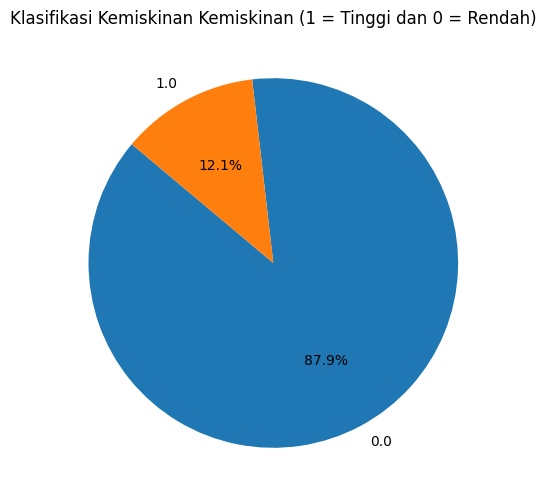

In [21]:
# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.title('Klasifikasi Kemiskinan Kemiskinan (1 = Tinggi dan 0 = Rendah)')

# Menghitung jumlah masing-masing Klasifikasi Kemiskinan
count_per_tingkat = df['Klasifikasi Kemiskinan'].value_counts()

# Membuat pie chart
plt.pie(count_per_tingkat, labels=count_per_tingkat.index, autopct='%1.1f%%', startangle=140)

plt.show()

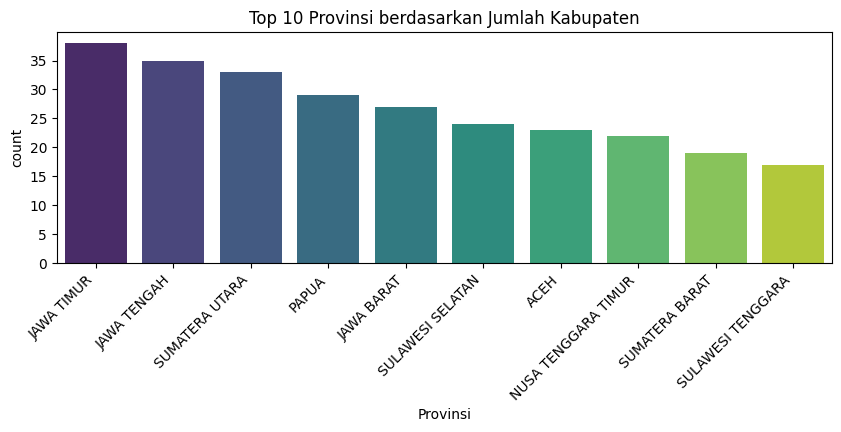

In [22]:
# Menghitung jumlah kabupaten per provinsi
count_per_provinsi = df['Provinsi'].value_counts()

# Mengambil top 10 provinsi
top_10_provinsi = count_per_provinsi.head(10)

# Membuat plot menggunakan seaborn dengan rotasi label 45 derajat
plt.figure(figsize=(10, 3))
plot = sns.countplot(x='Provinsi', data=df, order=top_10_provinsi.index, palette='viridis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  # Menambahkan rotasi 45 derajat
plt.title('Top 10 Provinsi berdasarkan Jumlah Kabupaten')
plt.show()

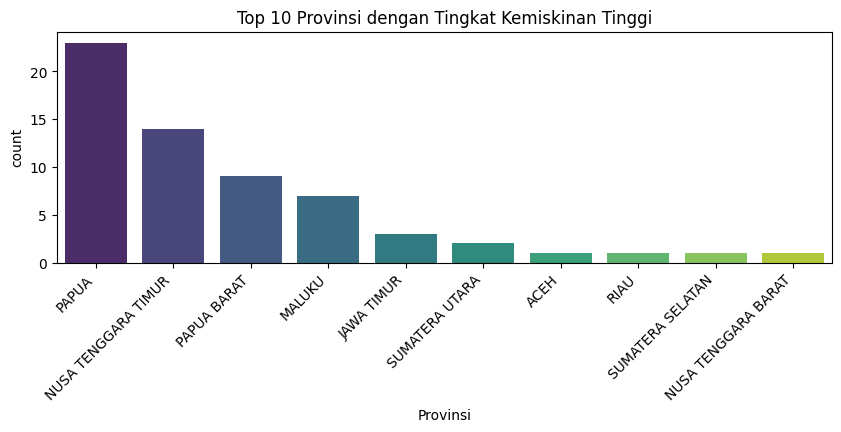

In [23]:
# Menghitung jumlah provinsi per tingkat kemiskinan
count_per_provinsi = df[df['Klasifikasi Kemiskinan'] == 1]['Provinsi'].value_counts()

# Mengambil top 10 provinsi dengan tingkat kemiskinan tinggi
top_10_tinggi = count_per_provinsi.head(10)

# Membuat plot menggunakan seaborn
plt.figure(figsize=(10,3))
plot = sns.countplot(x='Provinsi', data=df[df['Klasifikasi Kemiskinan'] == 1], order=top_10_tinggi.index, palette='viridis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.title('Top 10 Provinsi dengan Tingkat Kemiskinan Tinggi')
plt.show()

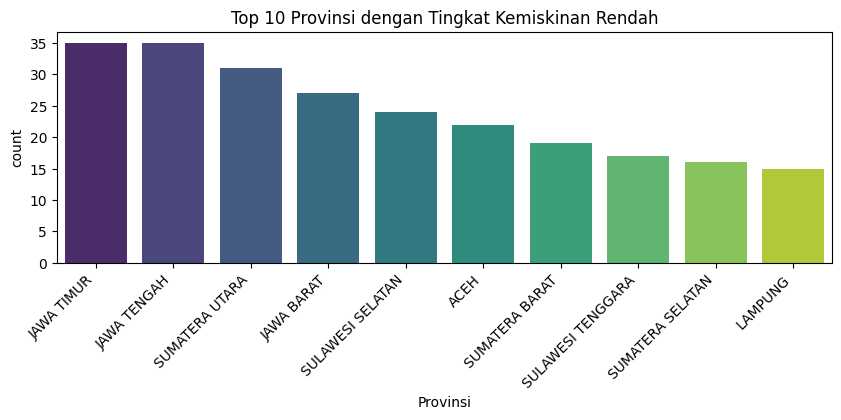

In [24]:
# Menghitung jumlah provinsi per tingkat kemiskinan
count_per_provinsi = df[df['Klasifikasi Kemiskinan'] ==0]['Provinsi'].value_counts()

# Mengambil top 10 provinsi dengan tingkat kemiskinan rendah
top_10_rendah = count_per_provinsi.head(10)

# Membuat plot menggunakan seaborn
plt.figure(figsize=(10,3))
plot = sns.countplot(x='Provinsi', data=df[df['Klasifikasi Kemiskinan'] == 0], order=top_10_rendah.index, palette='viridis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.title('Top 10 Provinsi dengan Tingkat Kemiskinan Rendah')
plt.show()

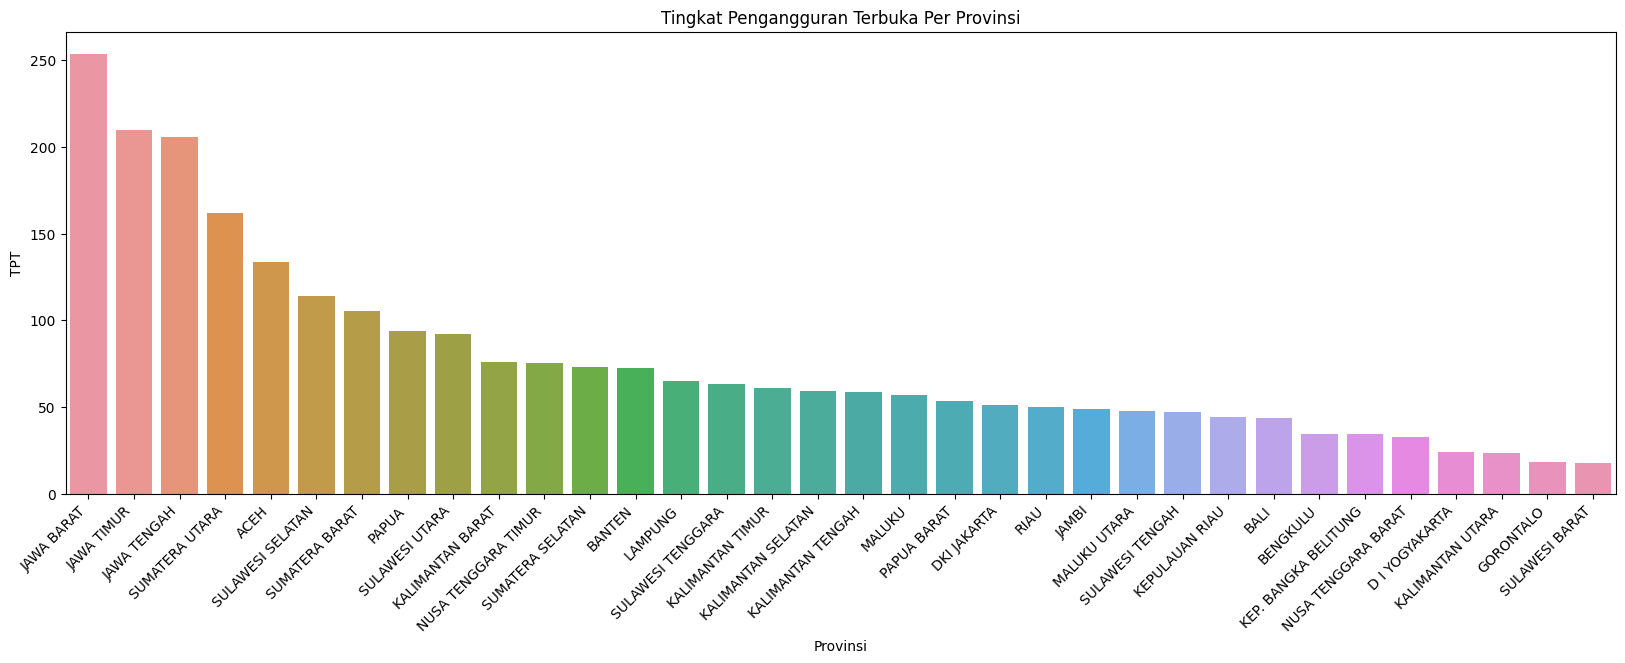

In [25]:
# Menghitung jumlah TPT berdasarkan setiap provinsi
df_grouped = df.groupby('Provinsi')['TPT'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah TPT dari yang terbesar hingga terkecil
df_sorted = df_grouped.sort_values(by='TPT', ascending=False)

# Membuat plot
plt.figure(figsize=(20, 6))
plot = sns.barplot(x='Provinsi', y='TPT', data=df_sorted)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.title('Tingkat Pengangguran Terbuka Per Provinsi')
plt.show()

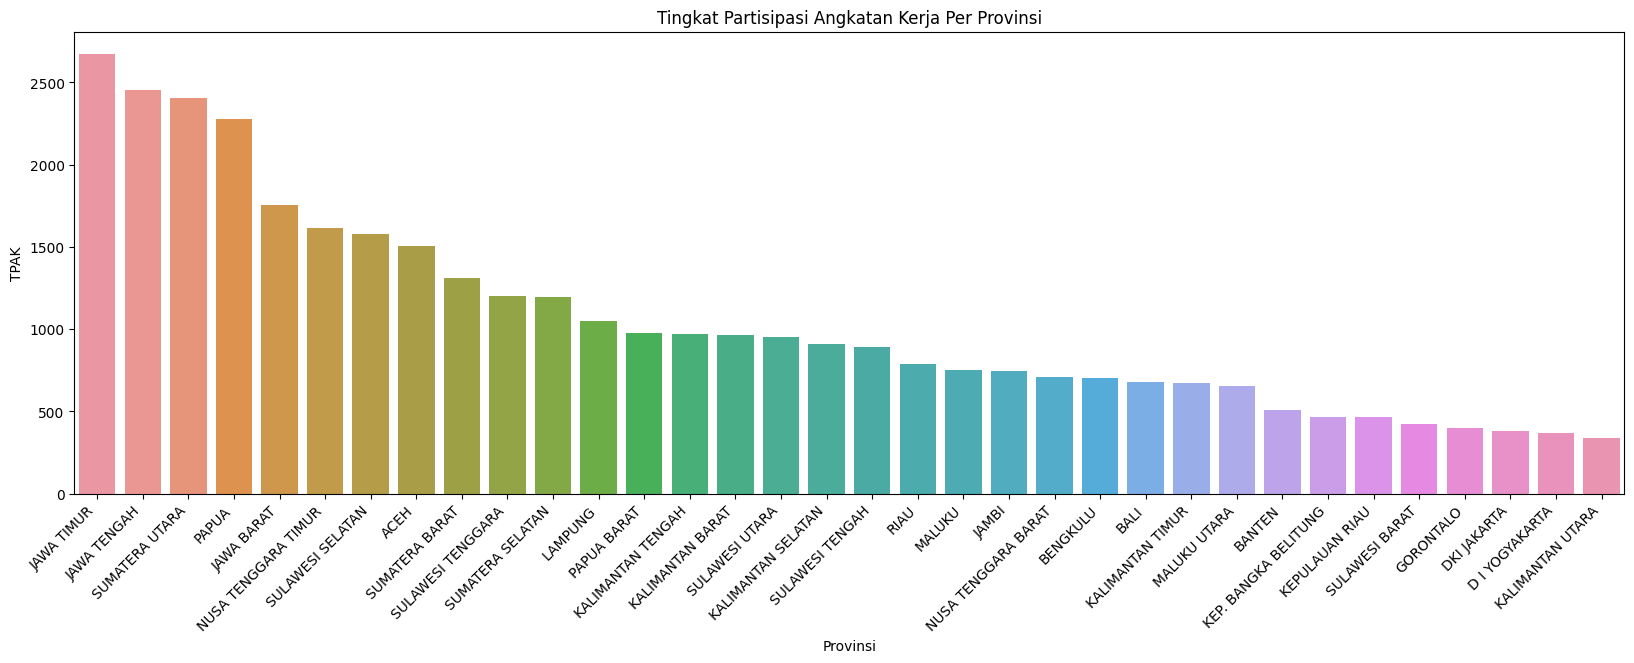

In [26]:
# Menghitung jumlah TPT berdasarkan setiap provinsi
df_grouped1 = df.groupby('Provinsi')['TPAK'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah TPT dari yang terbesar hingga terkecil
df_sorted1 = df_grouped1.sort_values(by='TPAK', ascending=False)

# Membuat plot
plt.figure(figsize=(20, 6))
plot = sns.barplot(x='Provinsi', y='TPAK', data=df_sorted1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.title('Tingkat Partisipasi Angkatan Kerja Per Provinsi')
plt.show()

# DATA PREPROCESSING

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

Provinsi                  0
Kab/Kota                  0
persentase_pm             0
lama_sekolah              0
pengeluaran_pk            0
IPM                       0
UHH                       0
sanitasi_layak            0
airminum_layak            0
TPT                       0
TPAK                      0
PDRB                      0
Klasifikasi Kemiskinan    0
dtype: int64

In [28]:
df = df.drop(['Kab/Kota'],axis=1)
df.head()

,Provinsi,persentase_pm,lama_sekolah,pengeluaran_pk,IPM,UHH,sanitasi_layak,airminum_layak,TPT,TPAK,PDRB,Klasifikasi Kemiskinan
0,ACEH,18.98,9.48,7148.0,66.41,65.28,71.56,87.45,5.71,71.15,1648096.0,0.0
1,ACEH,20.36,8.68,8776.0,69.22,67.43,69.56,78.58,8.36,62.85,1780419.0,1.0
2,ACEH,13.18,8.88,8180.0,67.44,64.40,62.55,79.65,6.46,60.85,4345784.0,0.0
3,ACEH,13.41,9.67,8030.0,69.44,68.22,62.71,86.71,6.43,69.62,3487157.0,0.0
4,ACEH,14.45,8.21,8577.0,67.83,68.74,66.75,83.16,7.13,59.48,8433526.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 513
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Provinsi                514 non-null    object 
 1   persentase_pm           514 non-null    float64
 2   lama_sekolah            514 non-null    float64
 3   pengeluaran_pk          514 non-null    float64
 4   IPM                     514 non-null    float64
 5   UHH                     514 non-null    float64
 6   sanitasi_layak          514 non-null    float64
 7   airminum_layak          514 non-null    float64
 8   TPT                     514 non-null    float64
 9   TPAK                    514 non-null    float64
 10  PDRB                    514 non-null    float64
 11  Klasifikasi Kemiskinan  514 non-null    float64
dtypes: float64(11), object(1)
memory usage: 52.2+ KB


In [30]:
# Melakukan label encoding
label_encoder = LabelEncoder()
df['Provinsi'] = label_encoder.fit_transform(df['Provinsi'])

df.head()

,Provinsi,persentase_pm,lama_sekolah,pengeluaran_pk,IPM,UHH,sanitasi_layak,airminum_layak,TPT,TPAK,PDRB,Klasifikasi Kemiskinan
0,0,18.98,9.48,7148.0,66.41,65.28,71.56,87.45,5.71,71.15,1648096.0,0.0
1,0,20.36,8.68,8776.0,69.22,67.43,69.56,78.58,8.36,62.85,1780419.0,1.0
2,0,13.18,8.88,8180.0,67.44,64.40,62.55,79.65,6.46,60.85,4345784.0,0.0
3,0,13.41,9.67,8030.0,69.44,68.22,62.71,86.71,6.43,69.62,3487157.0,0.0
4,0,14.45,8.21,8577.0,67.83,68.74,66.75,83.16,7.13,59.48,8433526.0,0.0


In [31]:
ind_col = [col for col in df.columns if col!= 'Klasifikasi Kemiskinan']
dep_col = 'Klasifikasi Kemiskinan'

#MODELING

In [32]:
x = df.drop(['Klasifikasi Kemiskinan'],axis=1)
y = df['Klasifikasi Kemiskinan']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [34]:
# Inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0,
    random_state=42, splitter='best'
)

# Latih model
model = dtc.fit(x_train, y_train)

# Prediksi label untuk data testing
y_pred = dtc.predict(x_test)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

akurasi data training = 0.9944289693593314
akurasi data testing = 0.9354838709677419 



In [35]:
df[df['Klasifikasi Kemiskinan'] == 0].head()

,Provinsi,persentase_pm,lama_sekolah,pengeluaran_pk,IPM,UHH,sanitasi_layak,airminum_layak,TPT,TPAK,PDRB,Klasifikasi Kemiskinan
0,0,18.98,9.48,7148.0,66.41,65.28,71.56,87.45,5.71,71.15,1648096.0,0.0
2,0,13.18,8.88,8180.0,67.44,64.40,62.55,79.65,6.46,60.85,4345784.0,0.0
3,0,13.41,9.67,8030.0,69.44,68.22,62.71,86.71,6.43,69.62,3487157.0,0.0
4,0,14.45,8.21,8577.0,67.83,68.74,66.75,83.16,7.13,59.48,8433526.0,0.0
5,0,15.26,9.86,10780.0,73.37,68.86,90.58,90.10,2.61,76.30,5953118.0,0.0


In [36]:
input_data = (0,18.98,9.48,7148.0,66.41,65.28,71.56,87.45,5.71,71.15,1648096.0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Klasifikasi Kemiskinan Rendah')
else:
  print('Klasifikasi Kemiskinan Tinggi')

[0.]
Klasifikasi Kemiskinan Rendah


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# VISUALISASI HASIL ALGORITMA

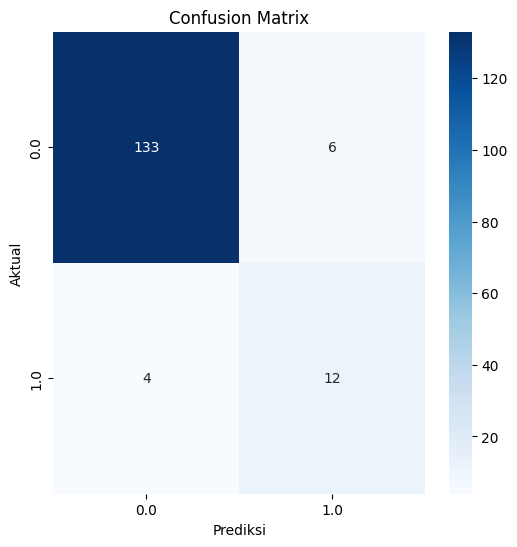

In [37]:
# Menampilkan confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

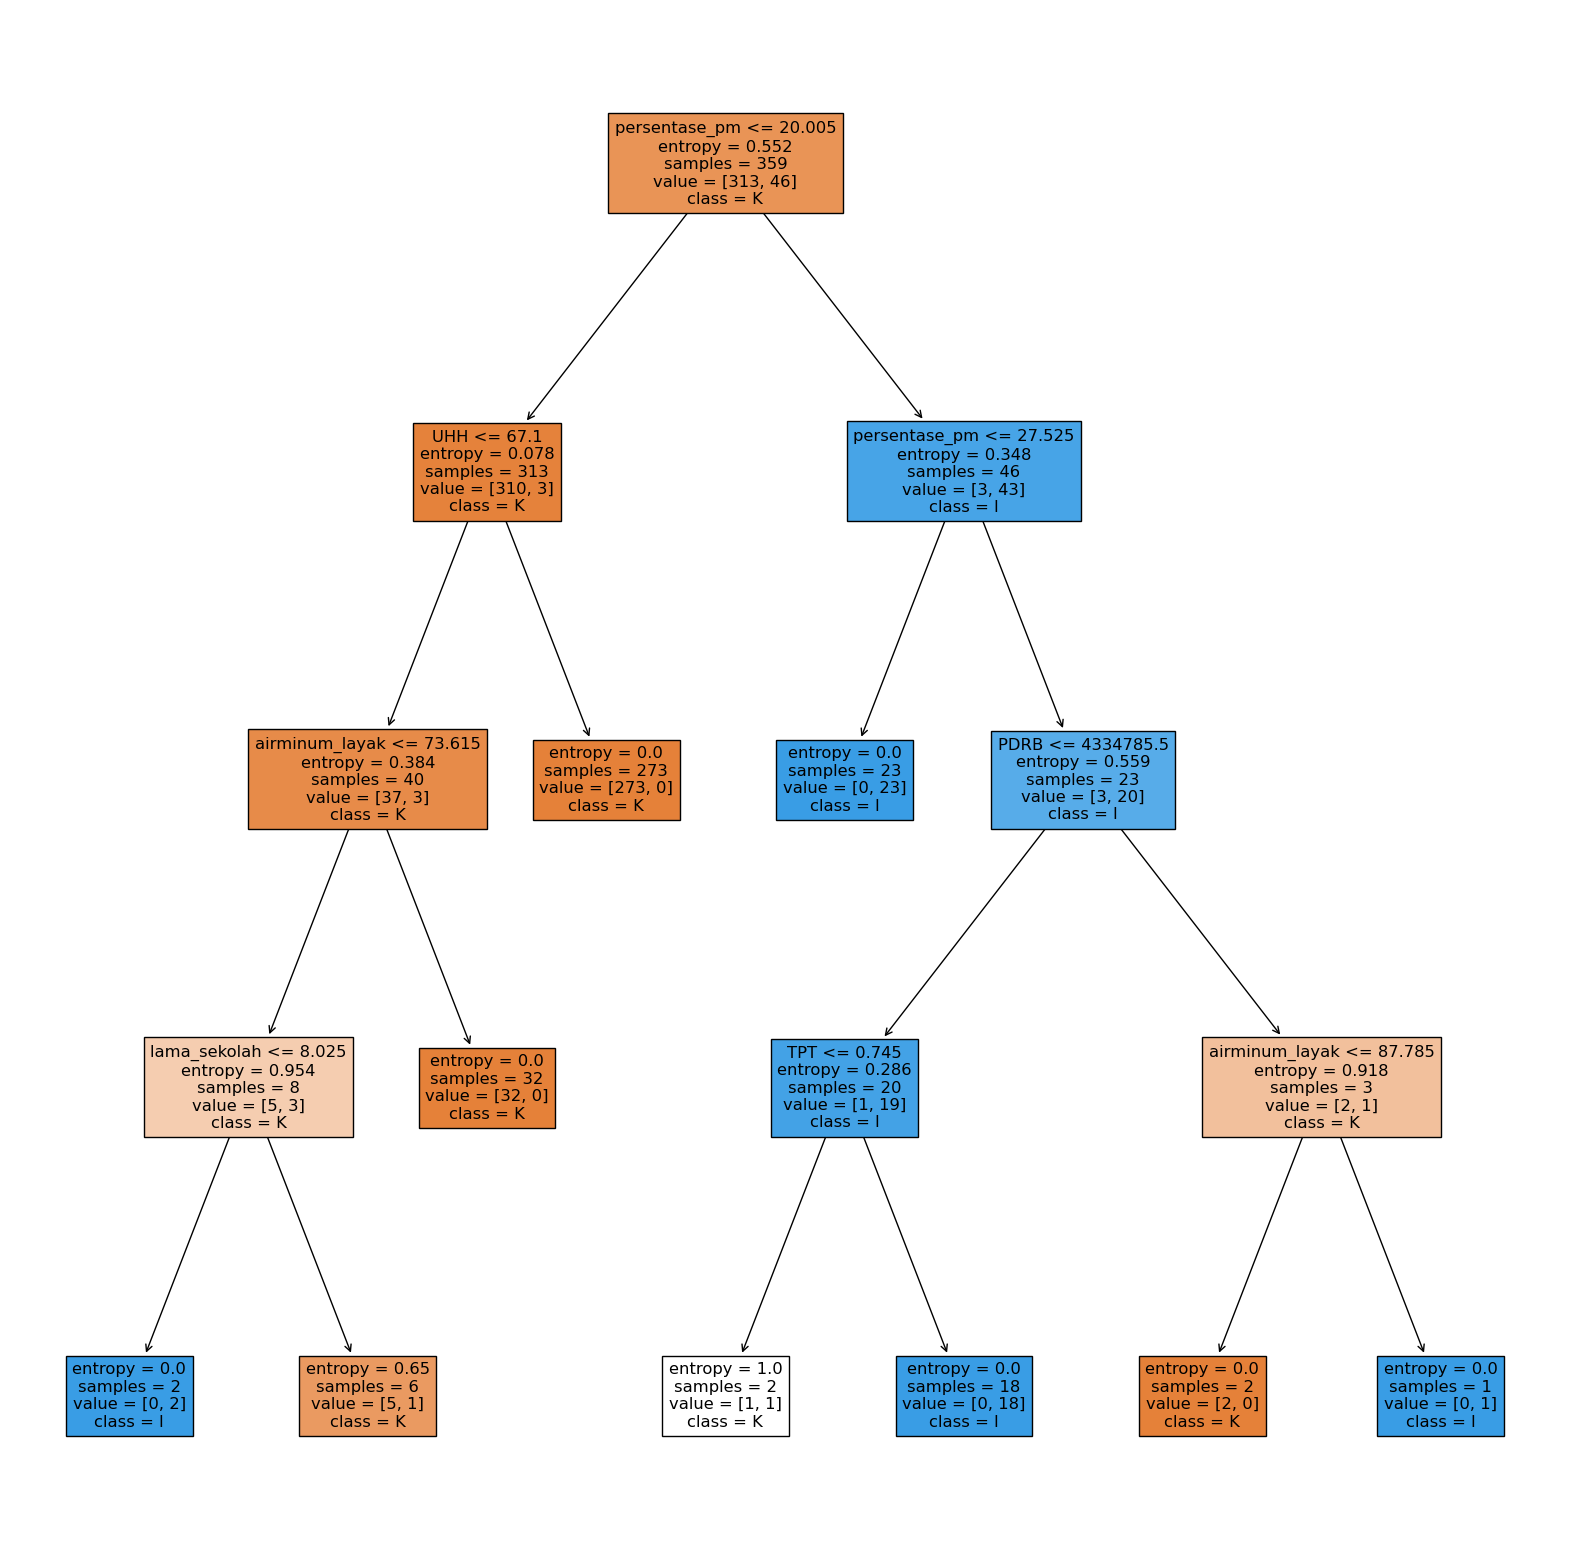

In [38]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=dep_col,
                   filled=True)

# SAVE MODEL

In [39]:
filename = 'd3_tingkat_kemiskinan.sav'
pickle.dump(model, open(filename,'wb'))